# Housing Price Predictor

we are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. Based on this model, the contractors can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [55]:
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [56]:
SEED = 100

In [57]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
#check the numbers of samples and features
df.shape

(1460, 81)

In [59]:
#drop the  'Id' colum since it's unnecessary for  the prediction process.
df.drop("Id", axis = 1, inplace = True)

df.shape

(1460, 80)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [61]:
pd.set_option('max_columns', 105)
df.describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
0%,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,85.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,206.000000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954

In [62]:
# Categorical vs Numerical 

numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


## Missing Value Treatment

In [63]:
def nan_counter(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    

    missing_data = pd.concat([total, percent,df.dtypes], axis=1, keys=['Total', 'Percent', 'DataType'])
    missing_data = missing_data.where(missing_data['Total'] >0).dropna()
    print(missing_data)
    
nan_counter(df)

               Total   Percent DataType
PoolQC        1453.0  0.995205   object
MiscFeature   1406.0  0.963014   object
Alley         1369.0  0.937671   object
Fence         1179.0  0.807534   object
FireplaceQu    690.0  0.472603   object
LotFrontage    259.0  0.177397  float64
GarageType      81.0  0.055479   object
GarageCond      81.0  0.055479   object
GarageFinish    81.0  0.055479   object
GarageQual      81.0  0.055479   object
GarageYrBlt     81.0  0.055479  float64
BsmtFinType2    38.0  0.026027   object
BsmtExposure    38.0  0.026027   object
BsmtQual        37.0  0.025342   object
BsmtCond        37.0  0.025342   object
BsmtFinType1    37.0  0.025342   object
MasVnrArea       8.0  0.005479  float64
MasVnrType       8.0  0.005479   object
Electrical       1.0  0.000685   object


The description suggests that it is not missing data: For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [64]:
cols_NAs_meaniningful = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_NAs_meaniningful:
    df[col].fillna('None',inplace=True)
    
nan_counter(df)

             Total   Percent DataType
LotFrontage  259.0  0.177397  float64
GarageYrBlt   81.0  0.055479  float64
MasVnrArea     8.0  0.005479  float64


In [65]:
'''
Filling the NA values in above 3 columns/attributes with mean of those attributes if there are no outliers as such
On accessing the describe function, we find that LotFrontage and MasVnrArea has outliers whereas GarageYrBlt is not having 
any outliers as such
'''
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
nan_counter(df)

             Total   Percent DataType
GarageYrBlt   81.0  0.055479  float64
MasVnrArea     8.0  0.005479  float64


Since the rest of amount of NANs is not that large for both GarageYrBlt and MasVnrArea, we can drop those enteries, rather than subtituting some arbitary values in place

In [66]:
df = df.dropna(subset=['GarageYrBlt','MasVnrArea'])

In [67]:
nan_counter(df)

Empty DataFrame
Columns: [Total, Percent, DataType]
Index: []


### Hence there are no NAN data entereis left

In [68]:
df.shape

(1371, 80)

In [69]:
df.isnull().sum().sum()

0

## Categorical Features

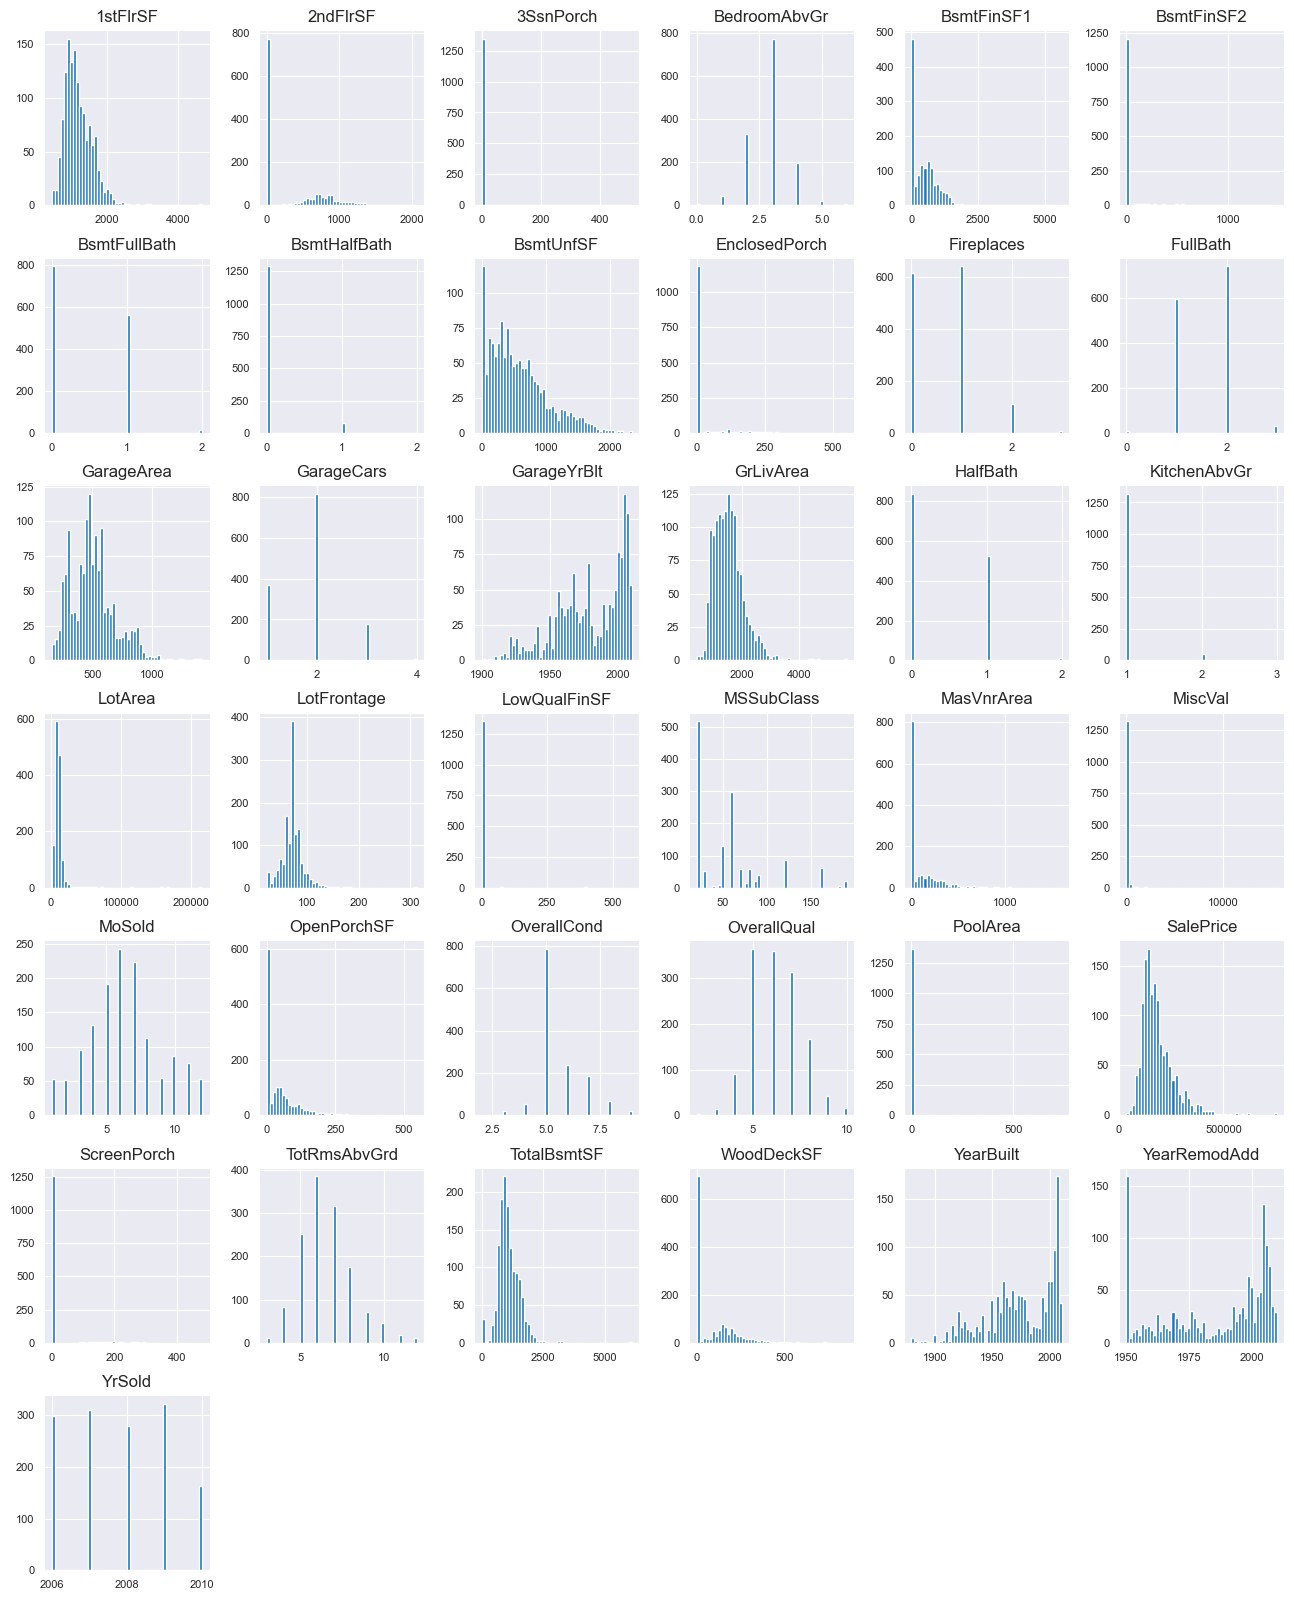

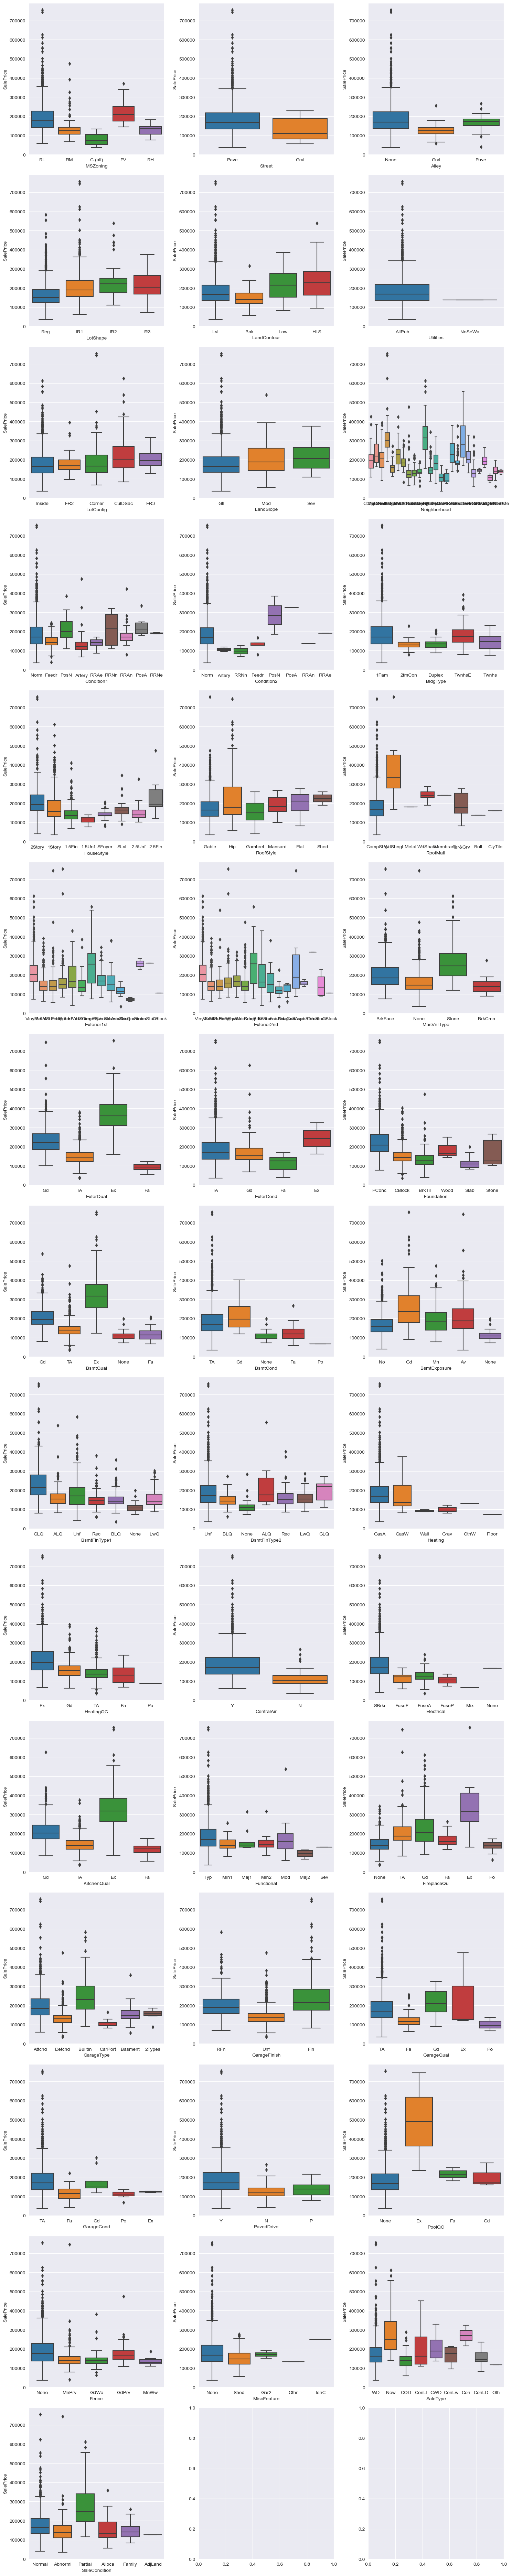

In [70]:
# Box Plots

li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df['SalePrice'], data=df.drop('SalePrice',axis=1), ax = axs[r][c]);
    
plt.tight_layout()    
plt.show() 

These features seem to be strongly correlated with SalePrice

'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual' and 'SaleType'

In [71]:
# creating a new df that has only numerical columns
df_num = df.select_dtypes(include=['float64','int64'])


# df_num.describe()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Lets see the effect of normalization on the distribution of price

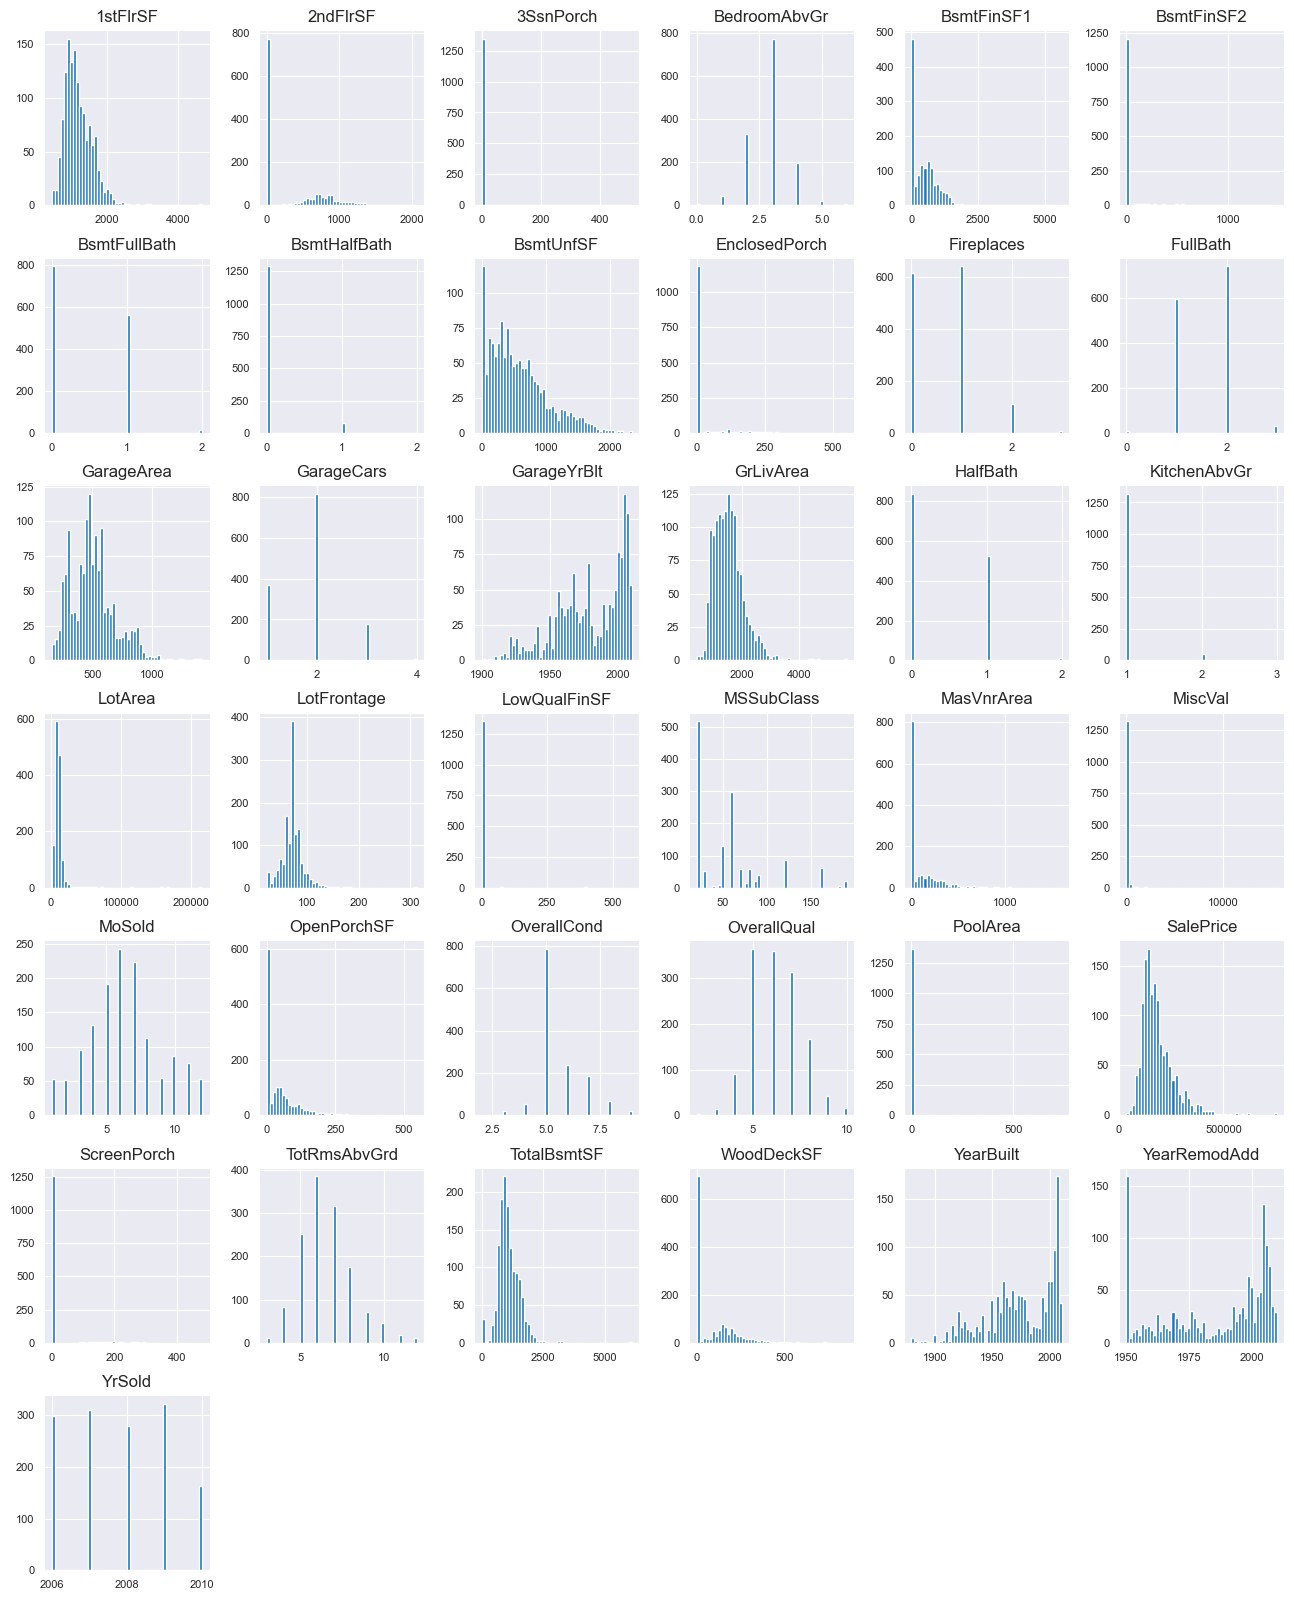

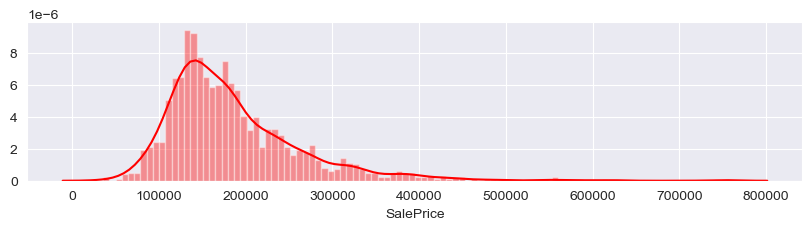

Measure of skewness: 1.936451233050694


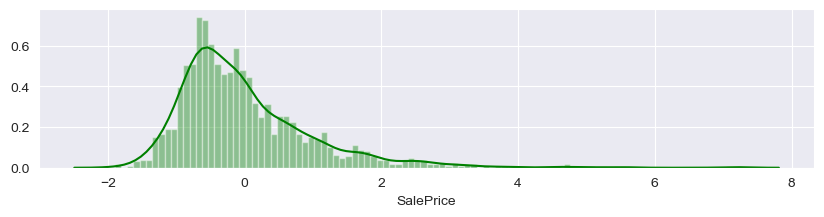

Measure of skewness: 1.9364512330506944


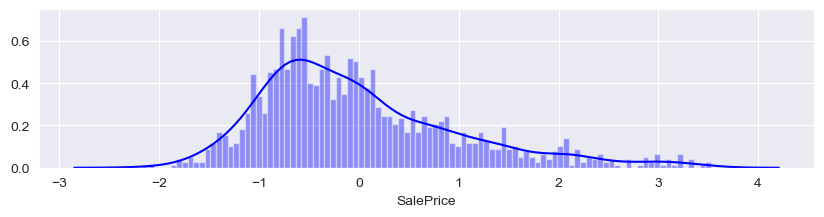

Measure of skewness: 1.0357596617180722


In [72]:
price = df_num['SalePrice']
plt.figure(figsize=(10,7))
plt.subplot(311)
sns.distplot(price, color='r', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(df_num['SalePrice'].skew()))


# normalized and with outliers
x = df_num['SalePrice']
price_all =  (x-x.mean())/x.std()

plt.figure(figsize=(10,7))
plt.subplot(312)
sns.distplot(price_all, color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(price_all.skew()))

# # normalized and outliers removed

x = df_num['SalePrice']
x = x[np.abs(x-x.mean()) <= (3*x.std())]
price_balanced =  (x-x.mean())/x.std()

plt.figure(figsize=(10,7))
plt.subplot(313)
sns.distplot(price_balanced, color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()

print("Measure of skewness: {}".format(price_balanced.skew()))

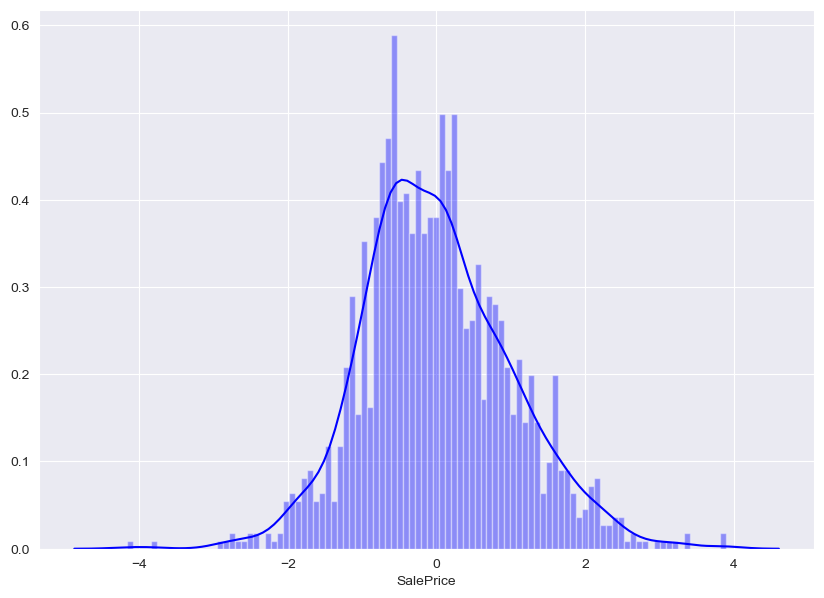

Measure of skewness: 0.2905977650678642


In [73]:
# Log transformation without removing outliers
x = np.log(df_num['SalePrice'])

# normalization
x =(x-x.mean())/x.std()

# plotting
plt.figure(figsize=(10,7))
sns.distplot(x, color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()
print("Measure of skewness: {}".format(x.skew()))

### Quantitative Corelations

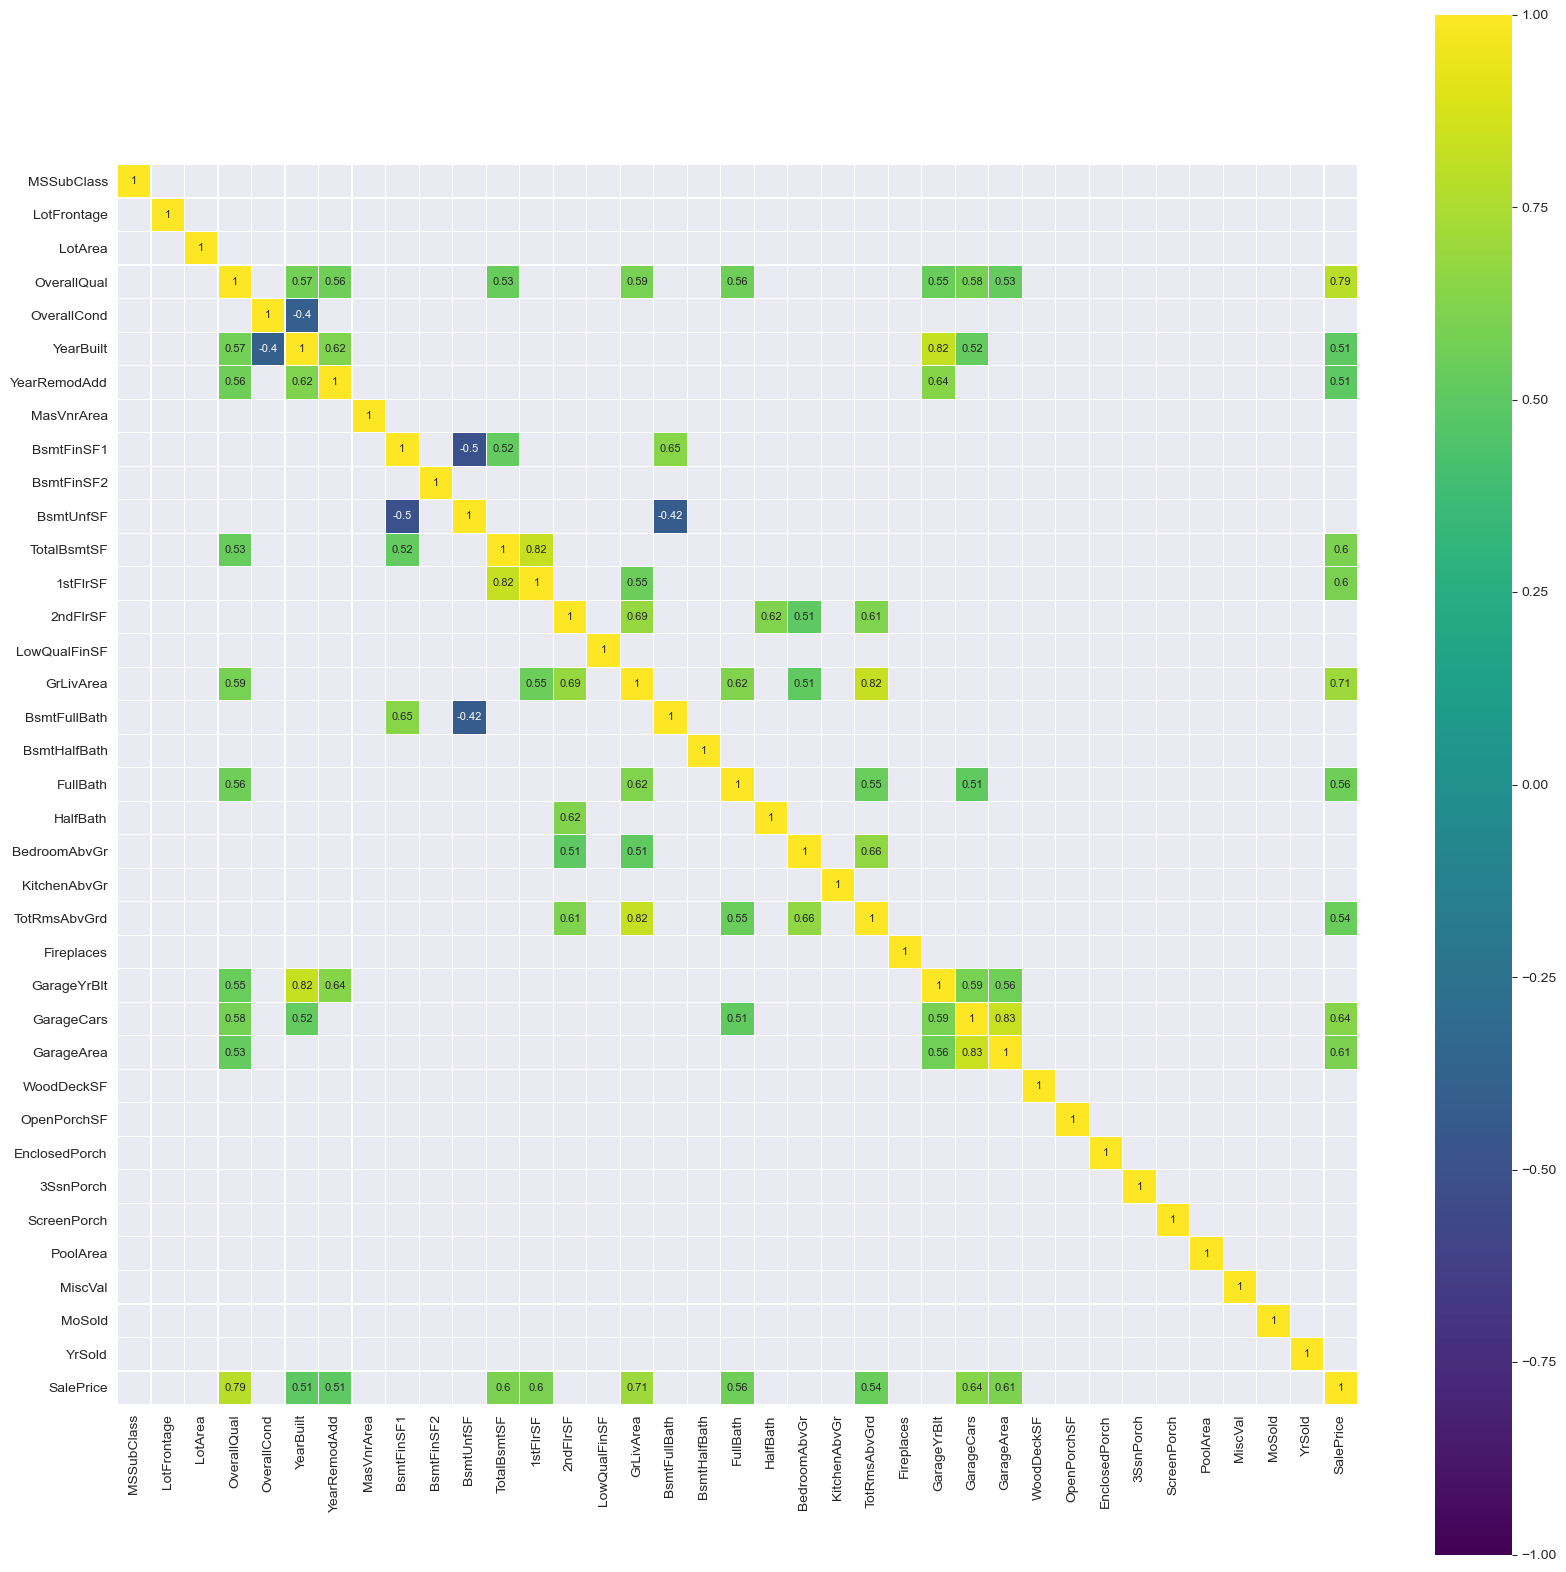

In [74]:
corr = df_num.corr()

# corr
plt.figure(figsize=(20, 20))


sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [75]:
# Considering that if correlation constant's value is above 0.5, its strongly correlated, 
# hence multicollinearity comes into picture

df_num_corr = df_num.corr()['SalePrice'][:-1]
best_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print("There are {} strongly correlated values with SalePrice:\n{}".format(len(best_features_list), best_features_list))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.786212
GrLivArea       0.709795
GarageCars      0.636118
GarageArea      0.607210
TotalBsmtSF     0.602981
1stFlrSF        0.595994
FullBath        0.558644
TotRmsAbvGrd    0.541117
YearBuilt       0.507696
YearRemodAdd    0.505673
Name: SalePrice, dtype: float64


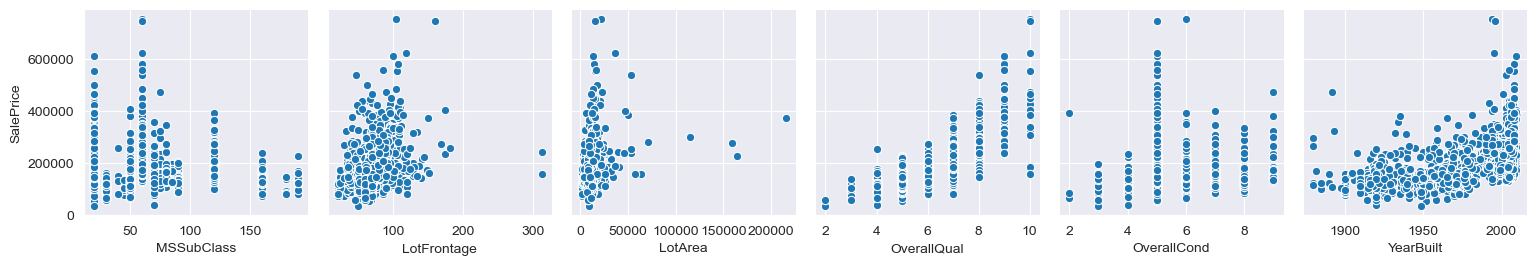

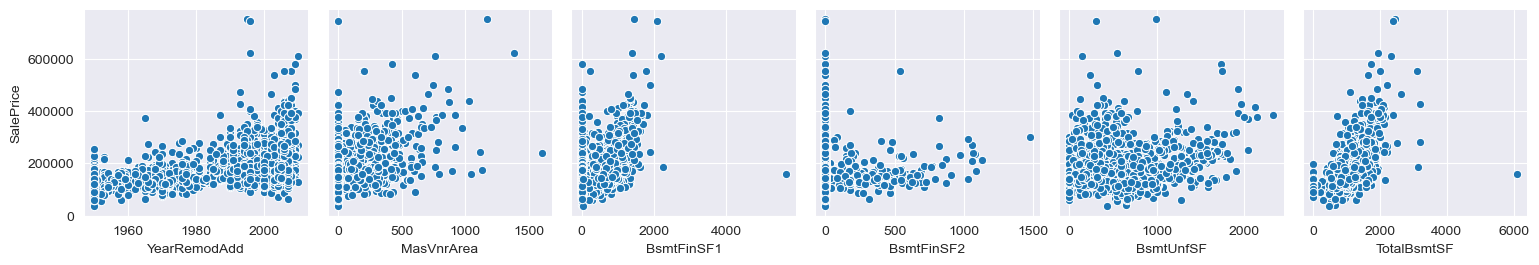

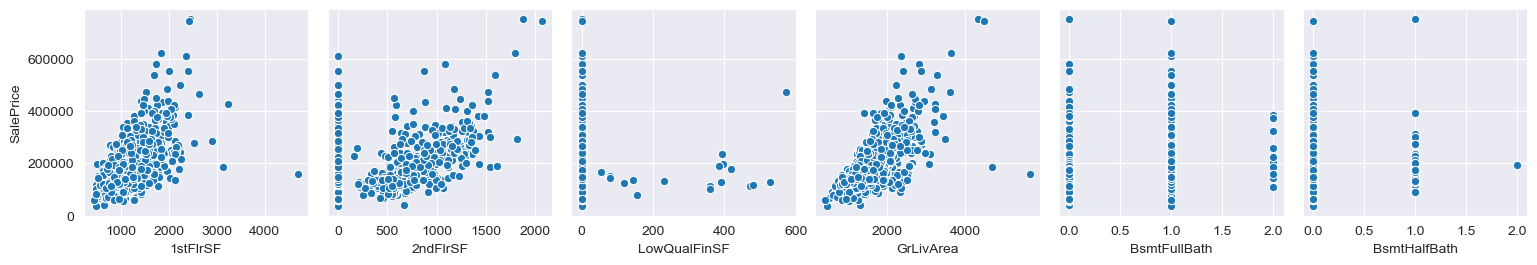

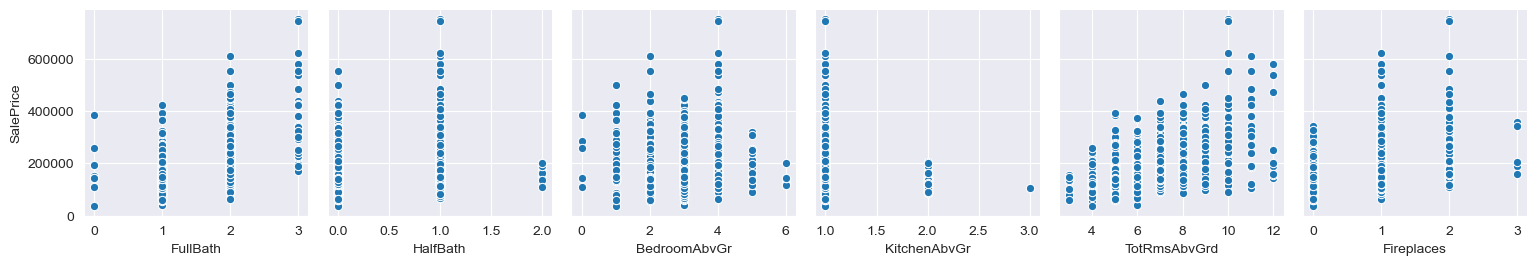

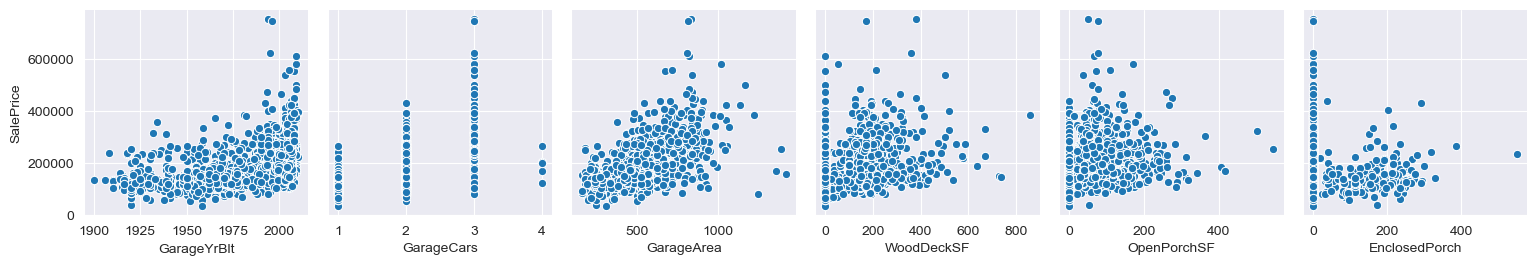

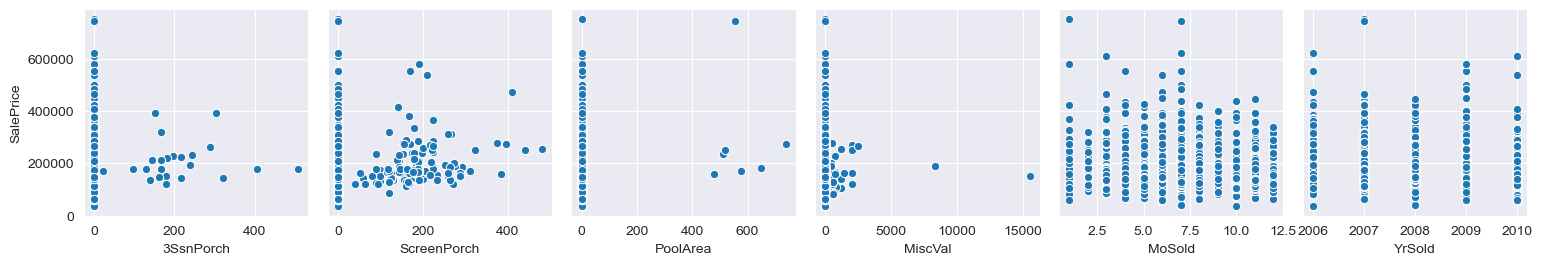

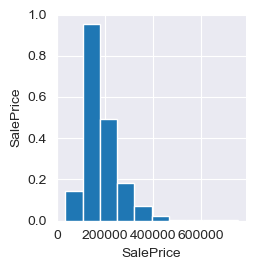

In [76]:
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['SalePrice']);
    plt.show()

In [77]:
# a lot of columns have data points located at x=0 which in our case represents the absence of the feature 

single_feature = []

for i in range(0, len(df_num.columns) - 1):
    
    x_df = df_num[[df_num.columns[i], 'SalePrice']]
    x_df = x_df[x_df[df_num.columns[i]] != 0]
    single_feature.append(x_df)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in single_feature}

# # sorted operation on dict converts it into a list of sorted key val pairs
# all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))

for key in all_correlations.keys():
    if all_correlations[key] > 0.5:
        if key not in best_features_list:
            print("{:>15}: {:>15}".format(key, all_correlations[key]))
        

       2ndFlrSF: 0.6750493686842512


#### We found 11 correlated features in total

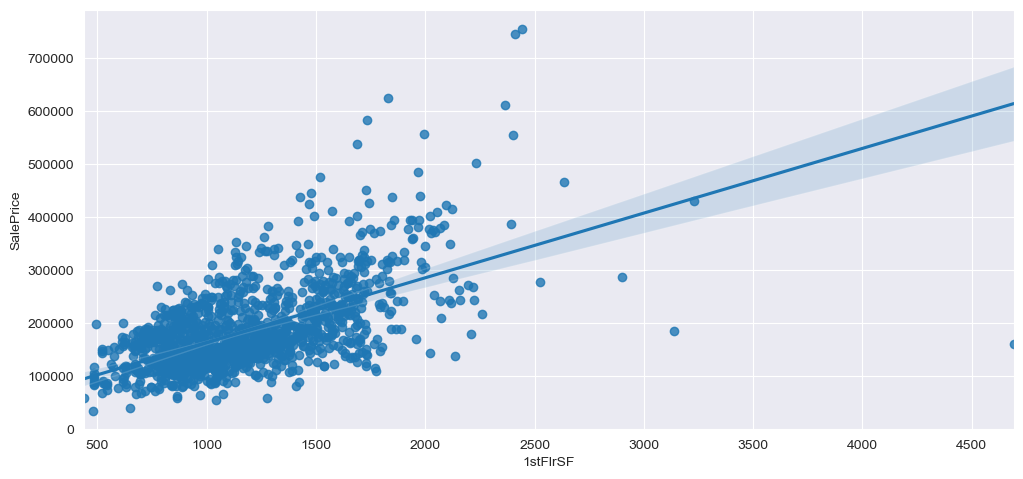

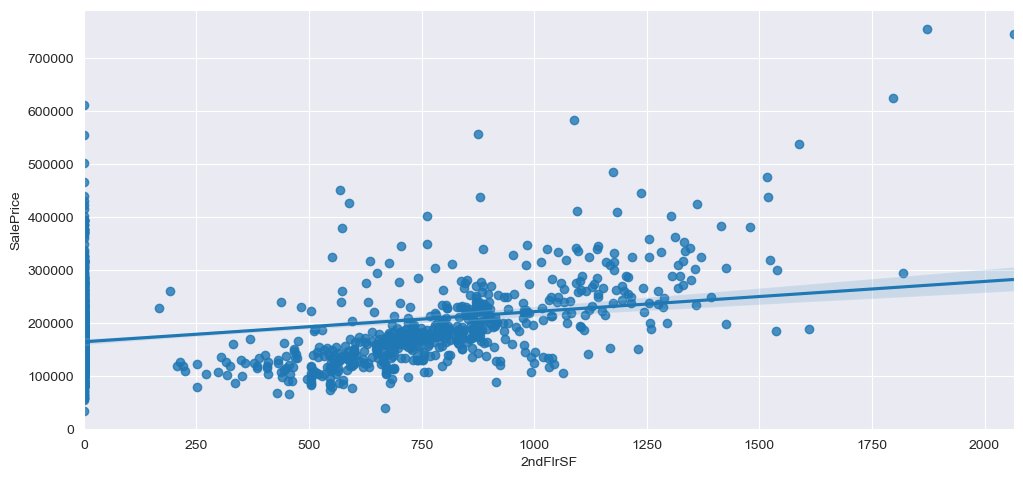

In [78]:
# Now lets analyse the floors 
micro_df = df[['1stFlrSF',"2ndFlrSF","GrLivArea","OverallQual","SalePrice"]]


# fig, ax = plt.subplots(121, 3, )

for i,k in enumerate(['1stFlrSF',"2ndFlrSF"]):
    plt.figure(figsize = (12, 12))
    plt.subplot(2,1,i+1)
    sns.regplot(x=micro_df[k],y='SalePrice', data = micro_df)
    plt.show()

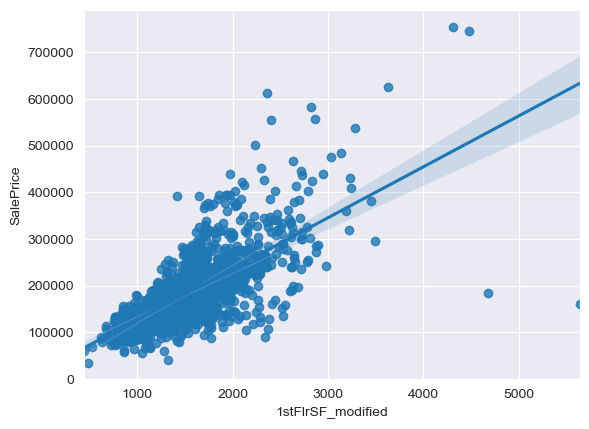

In [79]:
# let's create a dummy variable to indicate the presence of 2nd floor

micro_df.head()

micro_df["more_than_1_floor"] = micro_df['2ndFlrSF']>0

micro_df["more_than_1_floor"]=micro_df["more_than_1_floor"].astype(int)

# add the 2ndFlrSF values to 1stFlrSF
micro_df["1stFlrSF_modified"] = micro_df["1stFlrSF"]+ micro_df["2ndFlrSF"]

# drop the 2ndFlrSF
micro_df = micro_df.drop("2ndFlrSF",axis=1)

micro_df.head()

sns.regplot(x=micro_df["1stFlrSF_modified"],y='SalePrice', data = micro_df);
plt.show()

# Modeling

In [80]:
data = micro_df.drop(["SalePrice"],axis=1)
target = micro_df["SalePrice"]

In [81]:
data.head()

,1stFlrSF,GrLivArea,OverallQual,more_than_1_floor,1stFlrSF_modified
0,856,1710,7,1,1710
1,1262,1262,6,0,1262
2,920,1786,7,1,1786
3,961,1717,7,1,1717
4,1145,2198,8,1,2198


In [82]:
scaler = StandardScaler()

data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns) 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=SEED)

In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

185346.6052251524
[ -5468.09748725  -1999.13623053  40679.1915294  -22314.24886912
  48335.00298942]


In [86]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7516103350165783
0.7228298007036368
1733728463845.8462
427587190611.0648
1488178938.9234731
2075665973.8401206


## Ridge Regression

In [87]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [89]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7449.30603446 15992.95025128 37157.20403146 -9504.03622773
 16978.94053763]


In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7458647235599096
0.7106684494158522
1773832105538.3867
446348363509.08606
1522602665.698186
2166739628.6848836


## Lasso Regression

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [93]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [94]:
lasso.coef_

array([     0.        ,    184.70439342,  40443.08344722, -16525.16352972,
        39655.0300901 ])

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7507954648854988
0.7198999129471868
1739416154356.982
432107093824.92615
1493061076.701272
2097607251.5773113


In [96]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.516103e-01,7.458647e-01,7.507955e-01
1,R2 Score (Test),7.228298e-01,7.106684e-01,7.198999e-01
2,RSS (Train),1.733728e+12,1.773832e+12,1.739416e+12
3,RSS (Test),4.275872e+11,4.463484e+11,4.321071e+11
4,MSE (Train),3.857692e+04,3.902054e+04,3.864015e+04
5,MSE (Test),4.555948e+04,4.654825e+04,4.579964e+04


## Lets observe the changes in the coefficients after regularization

In [97]:
betas = pd.DataFrame(index=data.columns)

In [98]:
betas.rows = data.columns

In [99]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
betas

,Linear,Ridge,Lasso
1stFlrSF,-5468.097487,7449.306034,0.000000
GrLivArea,-1999.136231,15992.950251,184.704393
OverallQual,40679.191529,37157.204031,40443.083447
more_than_1_floor,-22314.248869,-9504.036228,-16525.163530
1stFlrSF_modified,48335.002989,16978.940538,39655.030090


'export' is not recognized as an internal or external command,
operable program or batch file.
